<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw4.5/Dellorco_GRB_Afterglow_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
%pylab inline
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from scipy.optimize import minimize
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#GRB=Gamma Ray Burst

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()
#filter is photometric band
#magnitude is inverse logarithmic scale
#magerr is uncertainty
#since upper limit is 1 for later data, error is NaN

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [3]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


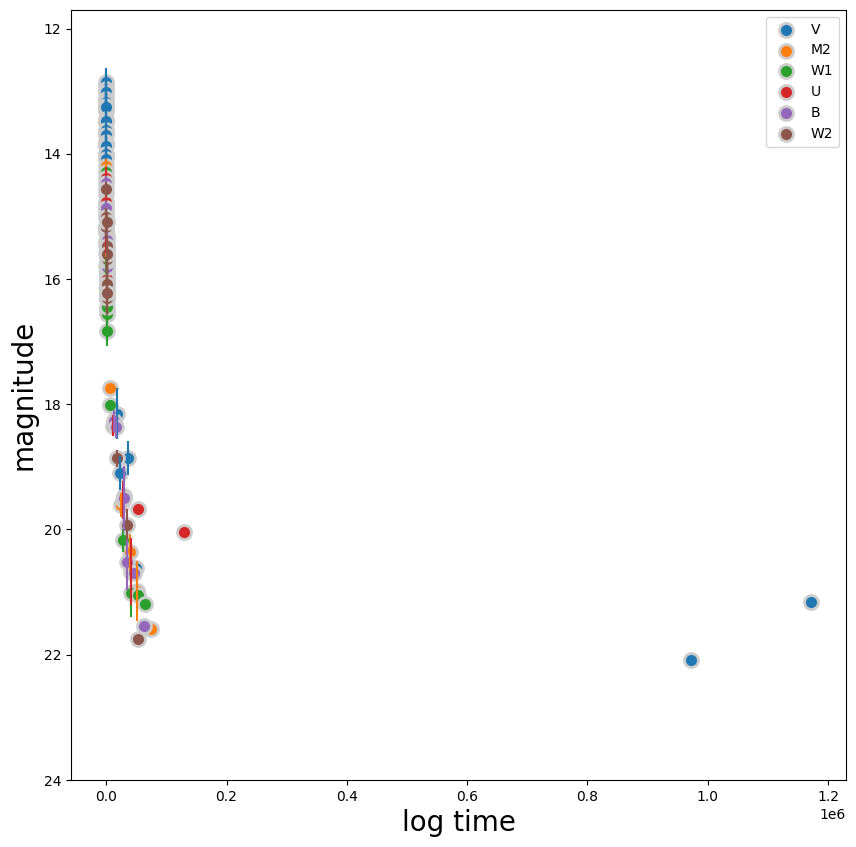

In [4]:
#create a figure container and an axis object inside of it
ax = plt.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give different colors naturally.
#Use plt.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
plt.ylim(24,11.7)
plt.legend()

#Always rememeber your axis labels!!
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("log time", fontsize=20);
#In log-log scale for x-y

In [5]:
grbAG['logtime'] = np.log10(grbAG['time'])

In [6]:
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


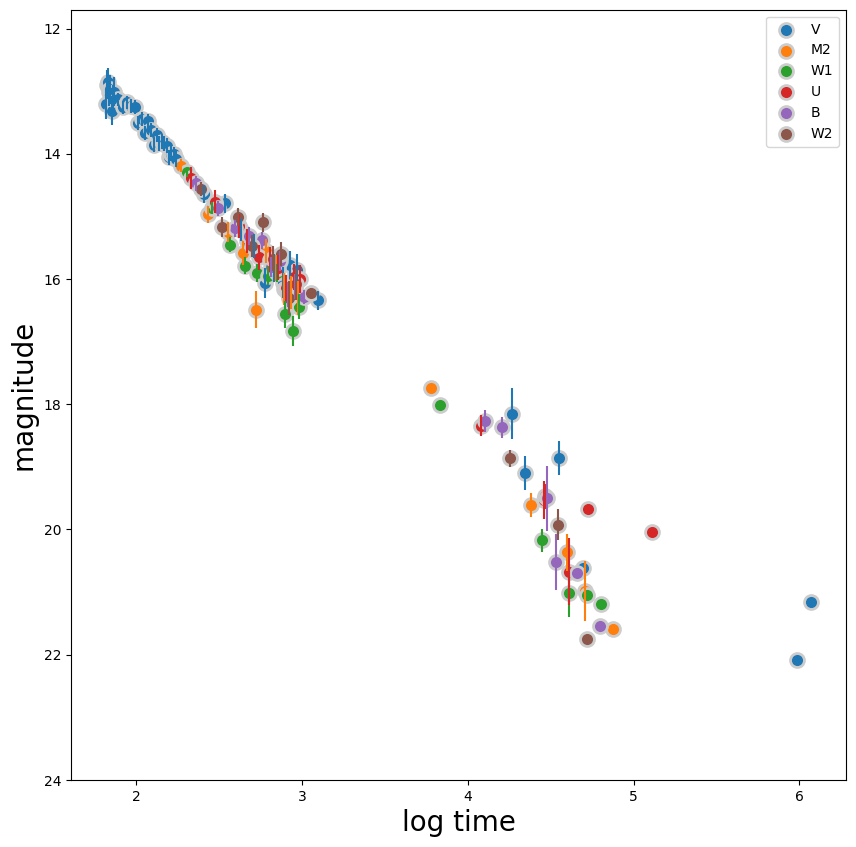

In [7]:
#create a figure container and an axis object inside of it
ax = plt.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give different colors naturally.
#Use plt.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
plt.ylim(24,11.7)
plt.legend()

#Always rememeber your axis labels!!
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("log time", fontsize=20);
#In log-log scale for x-y

In [8]:
#Dropping the upperlimit column
# grbAG_nupper = grbAG[grbAG.upperlimit==0]
# grbAG_nupper better to relabel but gonna do without relabeling to be consistent with her

In [9]:
grbAG = grbAG[grbAG.upperlimit==0]
grbAG
#drops all the upperlimit==1
#grbAG.upperlimit is the same as grbAG["upperlimit"]

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.210000,0.24,0,1.819544
1,V,67,12.900000,0.23,0,1.826075
2,V,68,12.860000,0.23,0,1.832509
3,V,69,13.010000,0.23,0,1.838849
4,V,70,12.970000,0.23,0,1.845098
...,...,...,...,...,...,...
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207


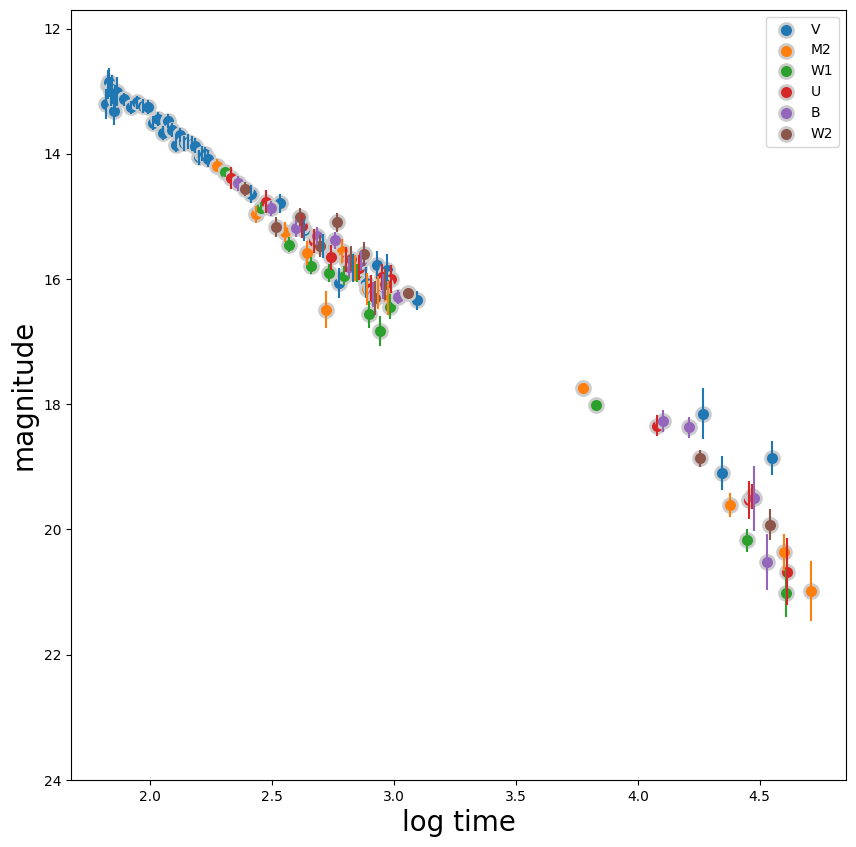

In [10]:
#create a figure container and an axis object inside of it
ax = plt.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give different colors naturally.
#Use plt.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
plt.ylim(24,11.7)
plt.legend()

#Always rememeber your axis labels!!
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("log time", fontsize=20);
#In log-log scale for x-y

In [11]:
x = grbAG["logtime"].values
X = np.c_[np.ones(len(x)), x] #creates matrix
y=grbAG["mag"].values
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #formula from slides
theta_best #gives intercept, slope

array([8.58266823, 2.51199984])

In [12]:
print("The best fit parameters from the Normal Equation are intercept: {0:.2f} slope: {1:.2f}".format(*theta_best))
#*makes pointer to get array
#Make sure to limit decimals because of sig figs

The best fit parameters from the Normal Equation are intercept: 8.58 slope: 2.51


In [13]:
lr.fit(X, y)

lr.coef_, lr.intercept_
#parameters that are internal to the model are called with an _ after the name

(array([0.        , 2.51199984]), 8.582668233648771)

In [14]:
print("The best fit parameters from sklearn are intercept: {0:.2f} slope: {1:.2f}".format(lr.intercept_,lr.coef_[1]))

The best fit parameters from sklearn are intercept: 8.58 slope: 2.51


In [15]:
#FUNCTIONS
def line(x, intercept, slope):
    return slope * x + intercept

def l1(args, x, y):
    a, b = args
    return np.sum(np.absolute(y - line(x, a, b)))

def l2(args, x, y):
    a, b = args
    return np.sum((y - line(x, a, b))**2)

def Rsquare(args, x, y):
    a, b = args
    y_pred = line(x, a, b)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

In [16]:
initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x, y))
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " +
       "intercept {:.2f}, slope {:.2f}".format(*l1Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.303317772383874
        x: [ 8.225e+00  2.641e+00]
      nit: 17
      jac: [-1.359e-01 -2.094e+00]
 hess_inv: [[ 1.935e-04 -4.675e-05]
            [-4.675e-05  1.132e-05]]
     nfev: 391
     njev: 125

best fit parameters from the minimization of L1: intercept 8.23, slope 2.64


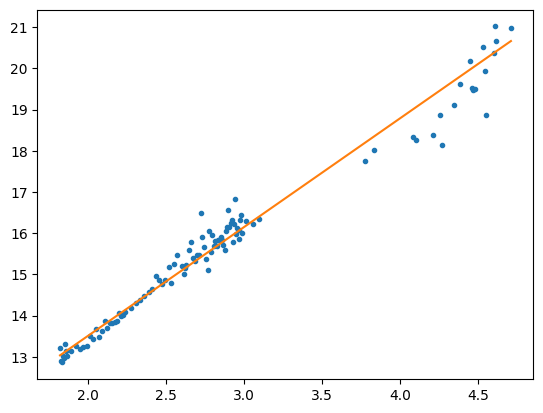

In [17]:
plt.plot(x,y, ".")
plt.plot(x, line(2.64, 8.23, x))

Figure: The data plotted with the best fit line generated using L1. Visually, it looks like this line fits well with the data.

In [18]:
initialGuess = (10, 1)

l2Solution = minimize(l2, initialGuess, args=(x, y))
print(l2Solution)
print("")
print("best fit parameters from the minimization of L2: " +
       "intercept {:.2f}, slope {:.2f}".format(*l2Solution.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 12.82598750072551
        x: [ 8.583e+00  2.512e+00]
      nit: 4
      jac: [ 0.000e+00  2.384e-07]
 hess_inv: [[ 6.254e-02 -2.030e-02]
            [-2.030e-02  7.114e-03]]
     nfev: 18
     njev: 6

best fit parameters from the minimization of L2: intercept 8.58, slope 2.51


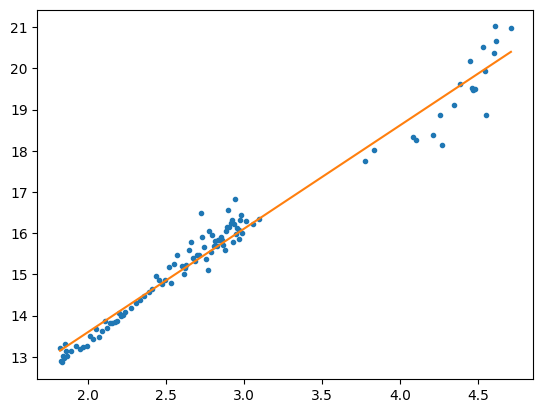

In [19]:
plt.plot(x,y, ".")
plt.plot(x, line(2.51, 8.58, x))

Figure: The data plotted with the best fit line generated using L2. Visually, it looks like this line is a decent fit, but not as good as the one generated using L1.

Text(0.5, 1.0, 'mag vs. logtime')

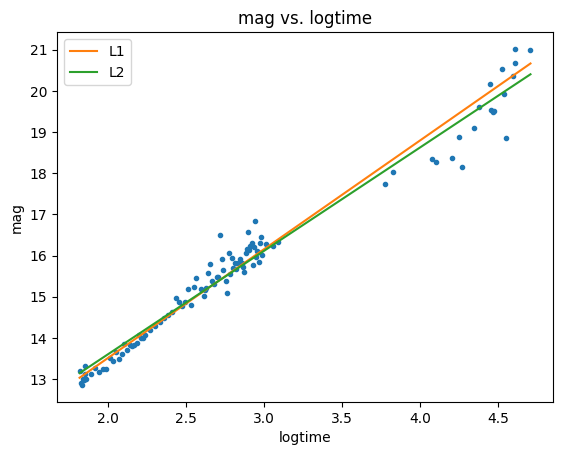

In [20]:
plt.plot(x,y, ".")
plt.plot(x, line(2.64, 8.23, x),label='L1')
plt.plot(x, line(2.51, 8.58, x),label='L2')
plt.legend()
plt.xlabel('logtime')
plt.ylabel('mag')
plt.title('mag vs. logtime')

Figure: L1 best fit line and L2 best fit line plotted with the data. It is easier to see this way visually that the lines are both decent fits for the data, and they do line up pretty closely.

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)

initialGuess = (8, 2)

L1Solution_goodsplit = minimize(l1, initialGuess, args=(x_train, y_train))


In [22]:
#Making test and training sets with 25% of the data being in the test set, and random_state being the seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

initialGuess = (10, 1)

l1Solution = minimize(l1, initialGuess, args=(x_train, y_train))

# Calculate R-squared values
train_r_squared = Rsquare(l1Solution.x, x_train, y_train)
test_r_squared = Rsquare(l1Solution.x, x_test, y_test)

print("Best fit parameters from the minimization of the L1 using training: slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))
print("R-squared on training set: ", train_r_squared)
print("R-squared on test set: ", test_r_squared)


Best fit parameters from the minimization of the L1 using training: slope 8.40, intercept 2.57
R-squared on training set:  0.9705518468727363
R-squared on test set:  0.9719324378565825


In [23]:
initialGuess = (10, 1)

l2Solution = minimize(l2, initialGuess, args=(x_train, y_train))

# Calculate R-squared values
train_r_squared = Rsquare(l2Solution.x, x_train, y_train)
test_r_squared = Rsquare(l2Solution.x, x_test, y_test)

print("Best fit parameters from the minimization of the L2 using training: slope {:.2f}, intercept {:.2f}".format(*l2Solution.x))
print("R-squared on training set: ", train_r_squared)
print("R-squared on test set: ", test_r_squared)


Best fit parameters from the minimization of the L2 using training: slope 8.66, intercept 2.48
R-squared on training set:  0.9716992501494643
R-squared on test set:  0.9695582517729407


Text(0.5, 0, 'log time')

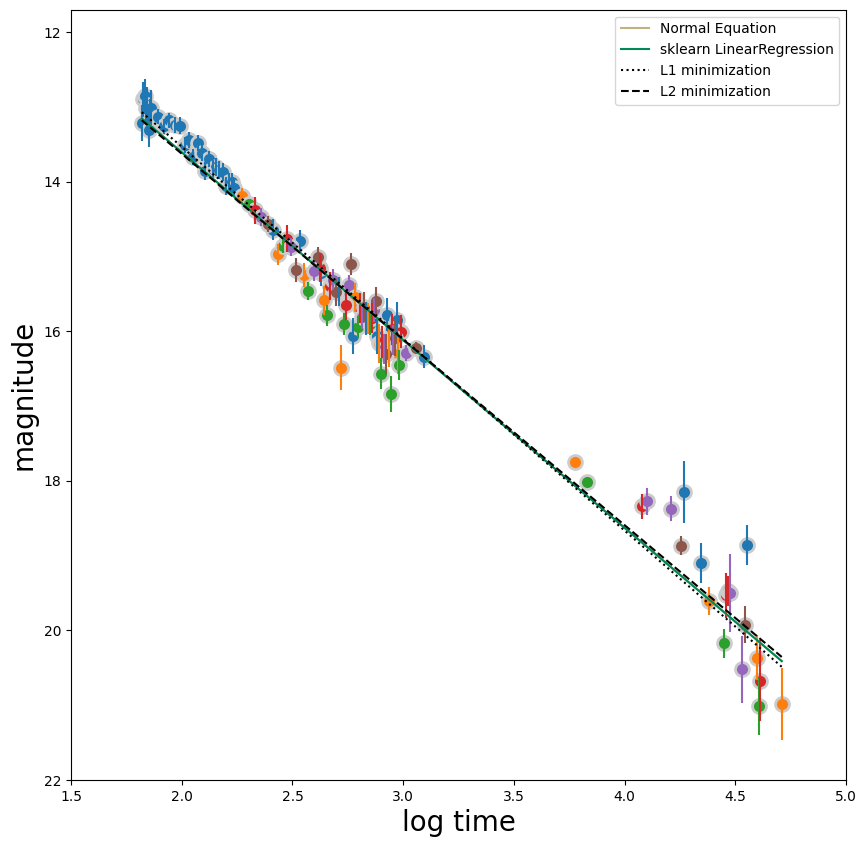

In [24]:
def plotline(pars, x, color='k', symbol='-', label='model',
             alpha=1, ax=ax):
    slope, intercept = pars  # Swap intercept and slope here
    y = line(intercept, slope, x)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)

ax = plt.figure(figsize=(10, 10)).add_subplot(111)

for f in grbAG["filter"].unique():
    plt.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0, fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    plt.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)

# plot the upper limits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    plt.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# plotting models
# use Kelley colors for maximum readability
# https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
# normal equation
plotline((lr.intercept_, lr.coef_[1]), grbAG.logtime.values,
         color='#' + colors[0],
         label="Normal Equation", ax=ax)
# sklearn
plotline((theta_best), grbAG.logtime,  # No need to swap here
         color='#' + colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
# minimize L1
plotline((l1Solution.x), grbAG.logtime,  # No need to swap here
         symbol=':',
         label="L1 minimization", ax=ax)
# minimize L2
plotline((l2Solution.x), grbAG.logtime,  # No need to swap here
         symbol='--',
         label="L2 minimization", ax=ax)

plt.legend()

plt.ylim(22, 11.7)
plt.xlim(1.5, 5)
plt.ylabel("magnitude", fontsize=20)
plt.xlabel("log time", fontsize=20)


Figure: All of the different regression lines plotted together. All of them are pretty close to each other and are all decent fits for the data. L1 is the only one that looks slightly off from the others.

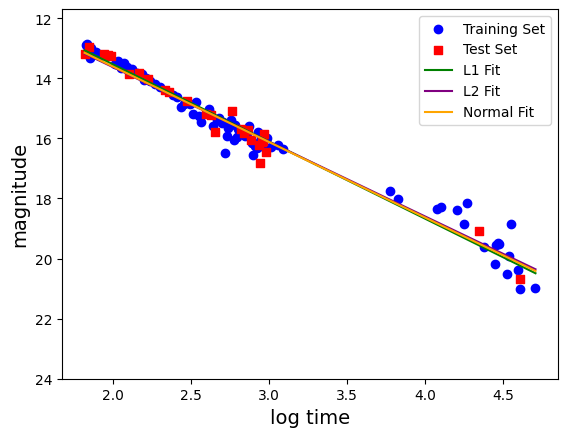

In [30]:
# Plot training points in blue
plt.scatter(x_train, y_train, c='blue', label='Training Set', marker='o')

# Plot test points in red
plt.scatter(x_test, y_test, c='red', label='Test Set', marker='s')

# Create a range of x values for the fitted lines
x_range = np.linspace(min(x), max(x), 100)

# Plot the L1 fitted line in green
plt.plot(x_range, l1Solution.x[1] * x_range + l1Solution.x[0], color='green', label='L1 Fit')

# Plot the L2 fitted line in purple
plt.plot(x_range, l2Solution.x[1] * x_range + l2Solution.x[0], color='purple', label='L2 Fit')

plt.plot(x_range, lr.coef_[1]*x_range+lr.intercept_, color='orange', label='Normal Fit')

# Set labels and legend
plt.xlabel("log time", fontsize=14)
plt.ylabel("magnitude", fontsize=14)
plt.ylim(24, 11.7)  # Inverted y-axis
plt.legend()

# Show the plot
plt.show()


Figure: I had trouble getting it into the format given in the slides shared, so I created my own version of the graph with the test and training sets denoted, and the normal, L1, and L2 fit lines graphed.

**-----Chi Square stuff I started to attempt, but unnecessary since in Slack it was stated we only need to include L1/L2 methods.-----**

In [25]:
def chi2(args, x, y, yerr):
  m, b = args
  return np.sum((y-line(x, m, b))**2 / yerr**2)
yerr=np.std(y)

m_true, b_true= 2.51199984, 8.582668233648771
chi2((m_true, b_true), x, y, yerr)

initialGuess = (8, 2)

solutionChi2  = minimize(chi2, initialGuess, args=(x, y, yerr))

solutionChi2.x
print(solutionChi2)
print("")
print("best fit parameters from the minimization of Chi Squared: " +
       "intercept {:.2f}, slope {:.2f}".format(*solutionChi2.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.0353610182375674
        x: [ 8.583e+00  2.512e+00]
      nit: 5
      jac: [ 2.980e-08  2.086e-07]
 hess_inv: [[ 2.643e-01 -8.577e-02]
            [-8.577e-02  3.006e-02]]
     nfev: 21
     njev: 7

best fit parameters from the minimization of Chi Squared: intercept 8.58, slope 2.51


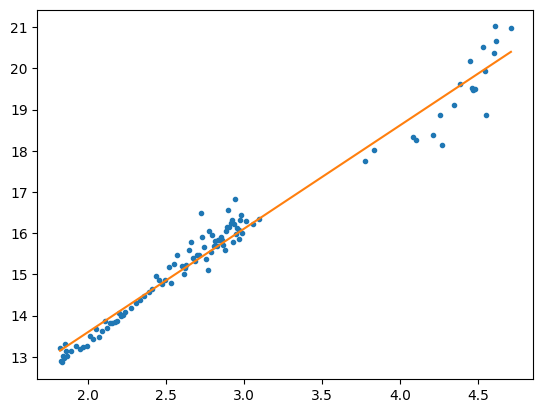

In [26]:
plt.plot(x,y, ".")
plt.plot(x, line(2.51,8.58, x))

Figure: Visually, you can tell that this line is a decent fit for the data.